CNN

In [ ]:
import cv2
import os
import pandas as pd
import math
from tqdm import tqdm
from glob import glob
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import IPython.display as display
from PIL import Image
import numpy as np

In [ ]:
os.getcwd()

'C:\\Users\\Rachael\\ML_Soc_Project\\data'

In [ ]:
os.chdir(path="C:/Users/Rachael/ML_Soc_Project/dataset/Soccer_actions/Goal")
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir() if isfile(join('',f))]
Goal = onlyfiles[1:]
os.chdir(path="C:/Users/Rachael/ML_Soc_Project/dataset/Soccer_actions/YellowCard")
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir() if isfile(join('',f))]
YellowCard = onlyfiles[1:]
os.chdir(path="C:/Users/Rachael/ML_Soc_Project/dataset/Soccer_actions/SoccerJuggling")
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir() if isfile(join('',f))]
SoccerJuggling = onlyfiles[1:]

In [ ]:
Goal,YellowCard,SoccerJuggling

(['v_goal_g01_c02.mkv',
  'v_goal_g01_c03.mkv',
  'v_goal_g01_c04.mkv',
  'v_goal_g01_c05.mkv',
  'v_goal_g02_c01.mkv',
  'v_goal_g02_c02.mkv',
  'v_goal_g02_c03.mkv',
  'v_goal_g02_c04.mkv',
  'v_goal_g02_c05.mkv',
  'v_goal_g02_c06.mkv',
  'v_goal_g03_c01.mkv',
  'v_goal_g03_c02.mkv',
  'v_goal_g03_c03.mkv',
  'v_goal_g03_c04.mkv',
  'v_goal_g04_c01.mkv',
  'v_goal_g04_c02.mkv',
  'v_goal_g05_c01.mkv',
  'v_goal_g05_c02.mkv',
  'v_goal_g05_c03.mkv',
  'v_goal_g05_c04.mkv',
  'v_goal_g06_c01.mkv',
  'v_goal_g06_c02.mkv',
  'v_goal_g06_c03.mkv',
  'v_goal_g07_c01.mkv',
  'v_goal_g07_c02.mkv',
  'v_goal_g07_c03.mkv',
  'v_goal_g08_c01.mkv',
  'v_goal_g08_c02.mkv',
  'v_goal_g08_c03.mkv',
  'v_goal_g08_c04.mkv',
  'v_goal_g08_c05.mkv',
  'v_goal_g09_c01.mkv',
  'v_goal_g09_c02.mkv',
  'v_goal_g10_c01.mkv',
  'v_goal_g10_c02.mkv',
  'v_goal_g10_c03.mkv',
  'v_goal_g11_c01.mkv',
  'v_goal_g11_c02.mkv',
  'v_goal_g11_c03.mkv',
  'v_goal_g12_c01.mkv',
  'v_goal_g12_c02.mkv',
  'v_goal_g12_c0

In [ ]:
GoalTrain = Goal[:int(len(Goal)*0.7)]
YellowCardTrain = YellowCard[1:int(len(YellowCard)*0.7)]
SoccerJugglingTrain = SoccerJuggling[1:int(len(SoccerJuggling)*0.7)]

In [ ]:
trainNames = []
for each in GoalTrain :
    trainNames.append(each)
for each in YellowCardTrain:
    trainNames.append(each)
for each in SoccerJugglingTrain:
    trainNames.append(each)

In [ ]:
len(trainNames)

291

In [ ]:
GoalTest = Goal[int(len(Goal)*0.7):]
YellowCardTest = YellowCard[int(len(YellowCard)*0.7):]
SoccerJugglingTest = SoccerJuggling[int(len(SoccerJuggling)*0.7):]
testNames = []
for each in GoalTest :
    testNames.append(each)
for each in YellowCardTest:
    testNames.append(each)
for each in SoccerJugglingTest:
    testNames.append(each)

In [ ]:
len(testNames)

127

In [ ]:
train = pd.DataFrame()
train['video_Names']=trainNames
train_video_tag = []
for i in range(train.shape[0]):
    train_video_tag.append(train['video_Names'][i].split('_')[1])
train['tag'] = train_video_tag    
print(train)

                      video_Names             tag
0              v_goal_g01_c02.mkv            goal
1              v_goal_g01_c03.mkv            goal
2              v_goal_g01_c04.mkv            goal
3              v_goal_g01_c05.mkv            goal
4              v_goal_g02_c01.mkv            goal
..                            ...             ...
286  v_SoccerJuggling_g18_c03.avi  SoccerJuggling
287  v_SoccerJuggling_g18_c04.avi  SoccerJuggling
288  v_SoccerJuggling_g18_c05.avi  SoccerJuggling
289  v_SoccerJuggling_g18_c06.avi  SoccerJuggling
290  v_SoccerJuggling_g18_c07.avi  SoccerJuggling

[291 rows x 2 columns]


In [ ]:
test = pd.DataFrame()
test['video_Names']=testNames
test_video_tag = []
for i in range(test.shape[0]):
    test_video_tag.append(test['video_Names'][i].split('_')[1])
test['tag'] = test_video_tag    
test   

,video_Names,tag
0,v_goal_g26_c02.mkv,goal
1,v_goal_g26_c03.mkv,goal
2,v_goal_g26_c04.mkv,goal
3,v_goal_g26_c05.mkv,goal
4,v_goal_g26_c06.mkv,goal
...,...,...
122,v_SoccerJuggling_g25_c02.avi,SoccerJuggling
123,v_SoccerJuggling_g25_c03.avi,SoccerJuggling
124,v_SoccerJuggling_g25_c04.avi,SoccerJuggling
125,v_SoccerJuggling_g25_c05.avi,SoccerJuggling


In [ ]:
os.getcwd()

'C:\\Users\\Rachael\\ML_Soc_Project\\dataset\\Soccer_actions\\SoccerJuggling'

In [ ]:
os.chdir('C:/Users/Rachael/ML_Soc_Project/dataset/')
os.getcwd()

'C:\\Users\\Rachael\\ML_Soc_Project\\dataset'

In [ ]:
#frames extraction
count=0
for i in tqdm(range(train.shape[0])):
    videoFile = train['video_Names'][i].split(" ")[0].split("_")[1]+"/"+train['video_Names'][i]
    cap = cv2.VideoCapture('Soccer_actions/'+videoFile)
    frameRate = cap.get(5)
    while(cap.isOpened()):
        frameId = cap.get(1)
        ret, frame = cap.read()
        if (ret != True):
            break
        if (frameId % math.floor(frameRate) == 0):
            filename = 'train/' + train["video_Names"][i].split("_")[1]+"_"+train['video_Names'][i].split("_")[2]+train['video_Names'][i].split("_")[3].split(".")[0]+"_frame%d.jpg" %count
            count = count+1
            cv2.imwrite(filename, frame)
            
    cap.release()

100%|██████████| 291/291 [01:48<00:00,  2.69it/s]


In [ ]:
images = glob("train/*.jpg")

In [ ]:
train_image = []
train_class =[]
for i in tqdm(range(len(images))):
    train_image.append(images[i].split('\\')[1])
    train_class.append(images[i].split('\\')[1].split("_")[0])


0it [00:00, ?it/s]


In [ ]:
train_data = pd.DataFrame()
train_data['image'] = train_image
train_data['class'] = train_class

train_data.to_csv('dataset/train_new.csv',header=True,index=False)

In [ ]:
count=0
for i in tqdm(range(test.shape[0])):
    
    videoFile = test['video_Names'][i].split(" ")[0].split("_")[1]+"/"+test['video_Names'][i]
    cap = cv2.VideoCapture('Soccer_actions/'+videoFile)
    frameRate = cap.get(5)
    while(cap.isOpened()):
        frameId = cap.get(1)
        ret, frame = cap.read()
        if (ret != True):
            break
        if (frameId % math.floor(frameRate) == 0):
            filename = 'test/' + test["video_Names"][i].split("_")[1]+"_"+test['video_Names'][i].split("_")[2]+test['video_Names'][i].split("_")[3].split(".")[0]+"_frame%d.jpg" %count
            count = count+1
            cv2.imwrite(filename, frame)
            
    cap.release()

100%|██████████| 127/127 [00:44<00:00,  2.88it/s]


In [ ]:
images = glob("test/*.jpg")

In [ ]:
test_image = []
test_class =[]
for i in tqdm(range(len(images))):
    test_image.append(images[i].split('\\')[1])
    test_class.append(images[i].split('\\')[1].split("_")[0])

In [ ]:
test_data = pd.DataFrame()
test_data['image'] = test_image
test_data['class'] = test_class

test_data.to_csv('dataset/test_new.csv',header=True,index=False)

In [ ]:
import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
cd C:\Users\Rachael\ML_Soc_Project\dataset

C:\Users\Rachael\ML_Soc_Project\dataset


In [ ]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [ ]:
CLASS_NAMES = ["Goal","YellowCard","SoccerJuggling"]

In [ ]:
#frames preprocessing
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True)

train_generator = train_datagen.flow_from_directory(
    'train/',
    target_size= (256, 256),
    color_mode = 'rgb')
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)
validation_generator = test_datagen.flow_from_directory(
    'test/',
    target_size= (256, 256),
    batch_size = 15,
    color_mode = 'rgb')


Found 1617 images belonging to 3 classes.
Found 611 images belonging to 3 classes.


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), input_shape = (256,256,3), activation = 'relu'))
model.add(layers.MaxPooling2D(pool_size = (2,2)))
model.add(layers.Dropout(0.05))
model.add(layers.Conv2D(32, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(pool_size = (2,2)))
model.add(layers.Dropout(0.07))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(pool_size = (2,2)))
model.add(layers.Dropout(0.15))
model.add(layers.Flatten())
model.add(layers.Dense(200, activation = 'relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(3, activation = 'softmax'))
model.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
             optimizer = 'adam',
             metrics = ['accuracy'])

history=model.fit_generator(train_generator,
                   epochs =10,validation_data=validation_generator)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
51/51 [==============================] - 142s 3s/step - loss: 0.6616 - accuracy: 0.7669 - val_loss: 0.7694 - val_accuracy: 0.6825
Epoch 2/10
51/51 [==============================] - 133s 3s/step - loss: 0.2900 - accuracy: 0.9128 - val_loss: 0.8837 - val_accuracy: 0.7381
Epoch 3/10
51/51 [==============================] - 130s 3s/step - loss: 0.2162 - accuracy: 0.9307 - val_loss: 0.5276 - val_accuracy: 0.8020
Epoch 4/10
51/51 [==============================] - 104s 2s/step - loss: 0.1602 - accuracy: 0.9499 - val_loss: 0.4614 - val_accuracy: 0.8543
Epoch 5/10
51/51 [==============================] - 109s 2s/step - loss: 0.1100 - accuracy: 0.9678 - val_loss: 0.5365 - val_accuracy: 0.7872
Epoch 6/10
51/51 [==============================] - 95s 2s/step - loss: 0.0825 - accuracy: 0.9740 - val_loss: 0.7129 - val_accuracy: 0.8167
Epoch 7/10
51/51 [==============================] - 94s 2s/step - loss: 0.0749 

In [ ]:
model.evaluate(validation_generator)

41/41 [==============================] - 8s 202ms/step - loss: 1.6906 - accuracy: 0.7349


[1.6905523538589478, 0.734860897064209]

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 125, 125, 32)      9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 60, 60, 64)       

In [ ]:
from keras.callbacks import History 

print(history.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


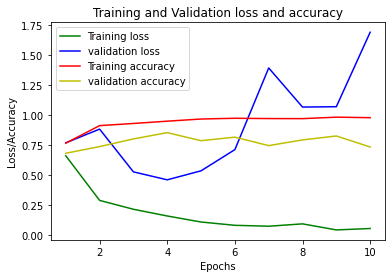

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
accuracy_train = history.history['accuracy']
accuracy_val = history.history['val_accuracy']
plt.plot(epochs, accuracy_train, 'r', label='Training accuracy')
plt.plot(epochs, accuracy_val, 'y', label='validation accuracy')
plt.title('Training and Validation loss and accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()

In [ ]:
import os.path
if os.path.isfile('models/ModelCNN1.h5') is False:
    model.save('models/ModelCNN1.h5')

In [ ]:
cd C:\Users\Rachael\ML_Soc_Project\dataset\

C:\Users\Rachael\ML_Soc_Project\dataset


In [ ]:
from keras.models import load_model
import numpy as np
from keras.preprocessing import image
from keras.preprocessing import image
model=load_model('models/modelCNN1.h5')

In [ ]:
#Predicting frames
test_image=image.load_img(r'C:\Users\Rachael\ML_Soc_Project\dataset\test\SoccerJuggling\SoccerJuggling_g19c03_frame234.jpg',target_size=(256,256))

test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
label=model.predict(test_image)
print(label)

if label[0][2]==1:
    print('YellowCard')
elif label[0][0]==1:
    print('Goal')
elif label[0][1]==1:
    print('SoccerJuggling')

[[0. 1. 0.]]
SoccerJuggling


In [ ]:
pwd

'C:\\Users\\Rachael\\ML_Soc_Project\\data'

CNN+bi-LSTM

In [ ]:
from keras.layers import Dense, Activation, Dropout, Bidirectional
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.optimizers import SGD
from keras import backend as K
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint
import os
import numpy as np
import cv2
from keras.preprocessing.image import img_to_array
import urllib.request
import sys
import patoolib

In [ ]:
MAX_NB_CLASSES = 4

def extract_frames(video_input_file_path, image_output_dir_path):
    if os.path.exists(image_output_dir_path):
        return
    count = 0
    print('Extracting frames from video: ', video_input_file_path)
    vidcap = cv2.VideoCapture(video_input_file_path)
    success, image = vidcap.read()
    success = True
    while success:
        vidcap.set(cv2.CAP_PROP_POS_MSEC, (count * 1000))  
        success, image = vidcap.read()
        if success:
            cv2.imwrite(image_output_dir_path + os.path.sep + "frame%d.jpg" % count, image) 
            count = count + 1

def scan_and_extract_frames(data_dir_path):
    input_data_dir_path = data_dir_path + '/Soccer_actions'
    output_frame_data_dir_path = data_dir_path + '/Soccer_actions_Frames'
    
    if not os.path.exists(output_frame_data_dir_path):
        os.makedirs(output_frame_data_dir_path)

    dir_count = 0
    for f in os.listdir(input_data_dir_path):
        file_path = input_data_dir_path + os.path.sep + f
        if not os.path.isfile(file_path):
            output_dir_name = f
            output_dir_path = output_frame_data_dir_path + os.path.sep + output_dir_name
            if not os.path.exists(output_dir_path):
                os.makedirs(output_dir_path)
            dir_count += 1
            for ff in os.listdir(file_path):
                video_file_path = file_path + os.path.sep + ff
                output_image_folder_path = output_dir_path + os.path.sep + ff.split('.')[0]
                if not os.path.exists(output_image_folder_path):
                    os.makedirs(output_image_folder_path)
                extract_frames(video_file_path, output_image_folder_path)
        if dir_count == MAX_NB_CLASSES:
            break


In [ ]:
def scan_labels(data_dir_path, labels):
    input_data_dir_path = data_dir_path + '/Soccer_actions'

    result = dict()

    dir_count = 0
    for label in labels:
        file_path = input_data_dir_path + os.path.sep + label
        if not os.path.isfile(file_path):
            dir_count += 1
            for ff in os.listdir(file_path):
                video_file_path = file_path + os.path.sep + ff
                result[video_file_path] = label
    print(result)
    return result


In [ ]:
MAX_NB_CLASSES = 20
def extract_features(model, video_input_file_path, feature_output_file_path):
    if os.path.exists(feature_output_file_path):
        return np.load(feature_output_file_path)
    count = 0
    print('Extracting frames from video: ', video_input_file_path)
    vidcap = cv2.VideoCapture(video_input_file_path)
    success, image = vidcap.read()
    features = []
    success = True
    while success:
        vidcap.set(cv2.CAP_PROP_POS_MSEC, (count * 1000)) 
        success, image = vidcap.read()
        if success:
            img = cv2.resize(image, (224, 224), interpolation=cv2.INTER_AREA)
            input = img_to_array(img)
            input = np.expand_dims(input, axis=0)
            input = preprocess_input(input)
            feature = model.predict(input).ravel()
            features.append(feature)
            count = count + 1
    unscaled_features = np.array(features)
    np.save(feature_output_file_path, unscaled_features)
    return unscaled_features


def scan_and_extract_features(data_dir_path, output_dir_path, model=None, data_set_name=None):
    if data_set_name is None:
        data_set_name = 'Soccer_actions'

    input_data_dir_path = data_dir_path + '/' + data_set_name
    output_feature_data_dir_path = data_dir_path + '/' + output_dir_path

    if model is None:
        model = VGG16(include_top=True, weights='imagenet')
        model.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['accuracy'])
    
    if not os.path.exists(output_feature_data_dir_path):
        os.makedirs(output_feature_data_dir_path)

    y_samples = []
    x_samples = []

    dir_count = 0
    for f in os.listdir(input_data_dir_path):
        file_path = input_data_dir_path + os.path.sep + f
        if not os.path.isfile(file_path):
            output_dir_name = f
            output_dir_path = output_feature_data_dir_path + os.path.sep + output_dir_name
            if not os.path.exists(output_dir_path):
                os.makedirs(output_dir_path)
            dir_count += 1
            for ff in os.listdir(file_path):
                video_file_path = file_path + os.path.sep + ff
                output_feature_file_path = output_dir_path + os.path.sep + ff.split('.')[0] + '.npy'
                x = extract_features(model, video_file_path, output_feature_file_path)
                y = f
                y_samples.append(y)
                x_samples.append(x)

        if dir_count == MAX_NB_CLASSES:
            break

    return x_samples, y_samples

def predict_input(model, video_input_file_path):
    print('Extracting frames from video: ', video_input_file_path)
    vidcap = cv2.VideoCapture(video_input_file_path)
    success, image = vidcap.read()
    features = []
    success = True
    count = 0
    while success:
        vidcap.set(cv2.CAP_PROP_POS_MSEC, (count * 1000))  
        success, image = vidcap.read()
        if success:
            img = cv2.resize(image, (224, 224), interpolation=cv2.INTER_AREA)
            input = img_to_array(img)
            input = np.expand_dims(input, axis=0)
            input = preprocess_input(input)
            feature = model.predict(input).ravel()
            features.append(feature)
            count = count + 1
    unscaled_features = np.array(features)
    return unscaled_features


In [ ]:

BATCH_SIZE = 64
NUM_EPOCHS = 20
VERBOSE = 1
HIDDEN_UNITS = 512
MAX_ALLOWED_FRAMES = 20
EMBEDDING_SIZE = 100

K.image_data_format()

def generate_batch(x_samples, y_samples):
    num_batches = len(x_samples) // BATCH_SIZE

    while True:
        for batchIdx in range(0, num_batches):
            start = batchIdx * BATCH_SIZE
            end = (batchIdx + 1) * BATCH_SIZE
            yield np.array(x_samples[start:end]), y_samples[start:end]


class Classifier(object):
    model_name = 'vgg16-bidirectional-lstm'

    def __init__(self):
        self.num_input_tokens = None
        self.nb_classes = None
        self.labels = None
        self.labels_idx2word = None
        self.model = None
        self.vgg16_model = None
        self.expected_frames = None
        self.vgg16_include_top = True
        self.config = None

    def create_model(self):
        model = Sequential()
        model.add(Bidirectional(LSTM(units=HIDDEN_UNITS, return_sequences=True),
                                input_shape=(self.expected_frames, self.num_input_tokens)))
        model.add(Bidirectional(LSTM(10)))
        model.add(Dense(512, activation='relu'))
        model.add(Dropout(0.5))

        model.add(Dense(self.nb_classes))

        model.add(Activation('softmax'))

        model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

        return model

    @staticmethod
    def get_config_file_path(model_dir_path, vgg16_include_top=None):
        if vgg16_include_top is None:
            vgg16_include_top = True
        if vgg16_include_top:
            return model_dir_path + '/' + Classifier.model_name + '-config.npy'
        

    @staticmethod
    def get_weight_file_path(model_dir_path, vgg16_include_top=None):
        if vgg16_include_top is None:
            vgg16_include_top = True
        if vgg16_include_top:
            return model_dir_path + '/' + Classifier.model_name + '-weights.h5'
        

    @staticmethod
    def get_architecture_file_path(model_dir_path, vgg16_include_top=None):
        if vgg16_include_top is None:
            vgg16_include_top = True
        if vgg16_include_top:
            return model_dir_path + '/' + Classifier.model_name + '-architecture.json'
       

    def load_model(self, config_file_path, weight_file_path):
        if os.path.exists(config_file_path):
            print('loading configuration from ', config_file_path)
        else:
            raise ValueError('cannot locate config file {}'.format(config_file_path))

        config = np.load(config_file_path, allow_pickle = True).item()
        self.num_input_tokens = config['num_input_tokens']
        self.nb_classes = config['nb_classes']
        self.labels = config['labels']
        self.expected_frames = config['expected_frames']
        self.vgg16_include_top = config['vgg16_include_top']
        self.labels_idx2word = dict([(idx, word) for word, idx in self.labels.items()])
        self.config = config

        self.model = self.create_model()
        if os.path.exists(weight_file_path):
            print('loading network weights from ', weight_file_path)
        else:
            raise ValueError('cannot local weight file {}'.format(weight_file_path))

        self.model.load_weights(weight_file_path)

        print('build vgg16 with pre-trained model')
        vgg16_model = VGG16(include_top=self.vgg16_include_top, weights='imagenet')
        vgg16_model.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['accuracy'])
        self.vgg16_model = vgg16_model

    def predict(self, video_file_path):
        x = predict_input(self.vgg16_model, video_file_path)
        frames = x.shape[0]
        if frames > self.expected_frames:
            x = x[0:self.expected_frames, :]
        elif frames < self.expected_frames:
            temp = np.zeros(shape=(self.expected_frames, x.shape[1]))
            temp[0:frames, :] = x
            x = temp
        predicted_class = np.argmax(self.model.predict(np.array([x]))[0])
        predicted_label = self.labels_idx2word[predicted_class]
        return predicted_label

    def fit(self, data_dir_path, model_dir_path, vgg16_include_top=True, data_set_name='Soccer_actions', test_size=0.3,
            random_state=42):

        self.vgg16_include_top = vgg16_include_top

        config_file_path = self.get_config_file_path(model_dir_path, vgg16_include_top)
        weight_file_path = self.get_weight_file_path(model_dir_path, vgg16_include_top)
        architecture_file_path = self.get_architecture_file_path(model_dir_path, vgg16_include_top)

        self.vgg16_model = VGG16(include_top=self.vgg16_include_top, weights='imagenet')
        self.vgg16_model.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['accuracy'])

        feature_dir_name = data_set_name + '-VGG16-Features'
        
        max_frames = 0
        self.labels = dict()
        x_samples, y_samples = scan_and_extract_features(data_dir_path,
                                                               output_dir_path=feature_dir_name,
                                                               model=self.vgg16_model,
                                                               data_set_name=data_set_name)
        self.num_input_tokens = x_samples[0].shape[1]
        frames_list = []
        for x in x_samples:
            frames = x.shape[0]
            frames_list.append(frames)
            max_frames = max(frames, max_frames)
        self.expected_frames = int(np.mean(frames_list))
        print('max frames: ', max_frames)
        print('expected frames: ', self.expected_frames)
        for i in range(len(x_samples)):
            x = x_samples[i]
            frames = x.shape[0]
            if frames > self.expected_frames:
                x = x[0:self.expected_frames, :]
                x_samples[i] = x
            elif frames < self.expected_frames:
                temp = np.zeros(shape=(self.expected_frames, x.shape[1]))
                temp[0:frames, :] = x
                x_samples[i] = temp
        for y in y_samples:
            if y not in self.labels:
                self.labels[y] = len(self.labels)
        print(self.labels)
        for i in range(len(y_samples)):
            y_samples[i] = self.labels[y_samples[i]]

        self.nb_classes = len(self.labels)

        y_samples = np_utils.to_categorical(y_samples, self.nb_classes)

        config = dict()
        config['labels'] = self.labels
        config['nb_classes'] = self.nb_classes
        config['num_input_tokens'] = self.num_input_tokens
        config['expected_frames'] = self.expected_frames
        config['vgg16_include_top'] = self.vgg16_include_top

        self.config = config

        np.save(config_file_path, config)

        model = self.create_model()
        open(architecture_file_path, 'w').write(model.to_json())

        Xtrain, Xtest, Ytrain, Ytest = train_test_split(x_samples, y_samples, test_size=test_size,
                                                        random_state=random_state)
        
        train_gen = generate_batch(Xtrain, Ytrain)
        test_gen = generate_batch(Xtest, Ytest)
        
        train_num_batches = len(Xtrain) // BATCH_SIZE
        test_num_batches = len(Xtest) // BATCH_SIZE
        
        checkpoint = ModelCheckpoint(filepath=weight_file_path, save_best_only=True)
        history = model.fit(train_gen, steps_per_epoch=train_num_batches,
                                      epochs=NUM_EPOCHS,
                                      verbose=1, validation_data=test_gen, validation_steps=test_num_batches,
                                      callbacks=[checkpoint])
        model.save_weights(weight_file_path)
        print("\n", model.summary())
        print("\n", model.evaluate(test_gen))
        return history


In [ ]:
#training dataset
import numpy as np
from keras import backend as K
import os
import sys


K.image_data_format() 

data_set_name = 'Soccer_actions'
input_dir_path = 'C:/Users/Rachael/ML_Soc_Project/data/demo/very_large_data'
output_dir_path = 'C:/Users/Rachael/ML_Soc_Project/data/demo/models/' + data_set_name
report_dir_path = 'C:/Users/Rachael/ML_Soc_Project/data/demo/reports/' + data_set_name

np.random.seed(42)


classifier = Classifier()

history = classifier.fit(data_dir_path=input_dir_path, model_dir_path=output_dir_path, data_set_name=data_set_name)




max frames:  31
expected frames:  5
{'Goal': 0, 'SoccerJuggling': 1, 'YellowCard': 2}
Epoch 1/20
4/4 [==============================] - 2s 567ms/step - loss: 1.0724 - accuracy: 0.4922 - val_loss: 0.9679 - val_accuracy: 0.5938
Epoch 2/20
4/4 [==============================] - 1s 338ms/step - loss: 0.7694 - accuracy: 0.6758 - val_loss: 0.4929 - val_accuracy: 0.8750
Epoch 3/20
4/4 [==============================] - 1s 318ms/step - loss: 0.4978 - accuracy: 0.8164 - val_loss: 0.3585 - val_accuracy: 0.9219
Epoch 4/20
4/4 [==============================] - 1s 265ms/step - loss: 0.2871 - accuracy: 0.9297 - val_loss: 0.3676 - val_accuracy: 0.8125
Epoch 5/20
4/4 [==============================] - 1s 316ms/step - loss: 0.2207 - accuracy: 0.9375 - val_loss: 0.2697 - val_accuracy: 0.9375
Epoch 6/20
4/4 [==============================] - 1s 278ms/step - loss: 0.1842 - accuracy: 0.9414 - val_loss: 0.2966 - val_accuracy: 0.8906
Epoch 7/20
4/4 [==============================] - 1s 265ms/step - loss: 0.

KeyboardInterrupt: 

In [ ]:
# Predicting videos in dataset
import numpy as np
import sys
import os


vgg16_include_top = True
data_dir_path = 'C:/Users/Rachael/ML_Soc_Project/data/demo/very_large_data'
model_dir_path = 'C:/Users/Rachael/ML_Soc_Project/data/demo/models/Soccer_actions'
config_file_path = Classifier.get_config_file_path(model_dir_path,vgg16_include_top=vgg16_include_top)
weight_file_path = Classifier.get_weight_file_path(model_dir_path,vgg16_include_top=vgg16_include_top)

np.random.seed(42)


predictor = Classifier()
predictor.load_model(config_file_path, weight_file_path)

print('reaching here three')

videos = scan_labels(data_dir_path, [label for (label, label_index) in predictor.labels.items()])

video_file_path_list = np.array([file_path for file_path in videos.keys()])
np.random.shuffle(video_file_path_list)

correct_count = 0
count = 0
pred = []
act = []
for video_file_path in video_file_path_list:
    label = videos[video_file_path]
    act.append(label)
    predicted_label = predictor.predict(video_file_path)
    pred.append(predicted_label)
    print('predicted: ' + predicted_label + ' actual: ' + label)
    correct_count = correct_count + 1 if label == predicted_label else correct_count
    count += 1
    accuracy = correct_count / count
    print('accuracy: ', accuracy)



loading configuration from  C:/Users/Rachael/ML_Soc_Project/data/demo/models/Soccer_actions/vgg16-bidirectional-lstm-config.npy
loading network weights from  C:/Users/Rachael/ML_Soc_Project/data/demo/models/Soccer_actions/vgg16-bidirectional-lstm-weights.h5
build vgg16 with pre-trained model
reaching here three
Extracting frames from video:  C:/Users/Rachael/ML_Soc_Project/data/demo/very_large_data/Soccer_actions\SoccerJuggling\v_SoccerJuggling_g02_c06.avi
predicted: SoccerJuggling actual: SoccerJuggling
accuracy:  1.0
Extracting frames from video:  C:/Users/Rachael/ML_Soc_Project/data/demo/very_large_data/Soccer_actions\SoccerJuggling\v_SoccerJuggling_g25_c05.avi
predicted: SoccerJuggling actual: SoccerJuggling
accuracy:  1.0
Extracting frames from video:  C:/Users/Rachael/ML_Soc_Project/data/demo/very_large_data/Soccer_actions\SoccerJuggling\v_SoccerJuggling_g08_c02.avi
predicted: SoccerJuggling actual: SoccerJuggling
accuracy:  1.0
Extracting frames from video:  C:/Users/Rachael/ML_

predicted: Goal actual: Goal
accuracy:  0.975609756097561
Extracting frames from video:  C:/Users/Rachael/ML_Soc_Project/data/demo/very_large_data/Soccer_actions\Goal\v_goal_g21_c02.mkv
predicted: Goal actual: Goal
accuracy:  0.9761904761904762
Extracting frames from video:  C:/Users/Rachael/ML_Soc_Project/data/demo/very_large_data/Soccer_actions\YellowCard\v_YellowCard_g34_c02.mp4
predicted: YellowCard actual: YellowCard
accuracy:  0.9767441860465116
Extracting frames from video:  C:/Users/Rachael/ML_Soc_Project/data/demo/very_large_data/Soccer_actions\Goal\v_goal_g09_c02.mkv
predicted: YellowCard actual: Goal
accuracy:  0.9545454545454546
Extracting frames from video:  C:/Users/Rachael/ML_Soc_Project/data/demo/very_large_data/Soccer_actions\Goal\v_goal_g30_c02.mp4
predicted: Goal actual: Goal
accuracy:  0.9555555555555556
Extracting frames from video:  C:/Users/Rachael/ML_Soc_Project/data/demo/very_large_data/Soccer_actions\YellowCard\v_YellowCard_g27_c03.mp4
predicted: YellowCard ac

predicted: YellowCard actual: YellowCard
accuracy:  0.975609756097561
Extracting frames from video:  C:/Users/Rachael/ML_Soc_Project/data/demo/very_large_data/Soccer_actions\Goal\v_goal_g07_c01.mkv
predicted: Goal actual: Goal
accuracy:  0.9759036144578314
Extracting frames from video:  C:/Users/Rachael/ML_Soc_Project/data/demo/very_large_data/Soccer_actions\Goal\v_goal_g05_c01.mkv
predicted: Goal actual: Goal
accuracy:  0.9761904761904762
Extracting frames from video:  C:/Users/Rachael/ML_Soc_Project/data/demo/very_large_data/Soccer_actions\Goal\v_goal_g19_c02.mkv
predicted: Goal actual: Goal
accuracy:  0.9764705882352941
Extracting frames from video:  C:/Users/Rachael/ML_Soc_Project/data/demo/very_large_data/Soccer_actions\Goal\v_goal_g38_c02.mp4
predicted: Goal actual: Goal
accuracy:  0.9767441860465116
Extracting frames from video:  C:/Users/Rachael/ML_Soc_Project/data/demo/very_large_data/Soccer_actions\Goal\v_goal_g08_c05.mkv
predicted: Goal actual: Goal
accuracy:  0.977011494252

predicted: YellowCard actual: YellowCard
accuracy:  0.9512195121951219
Extracting frames from video:  C:/Users/Rachael/ML_Soc_Project/data/demo/very_large_data/Soccer_actions\Goal\v_goal_g28_c06.mp4
predicted: Goal actual: Goal
accuracy:  0.9516129032258065
Extracting frames from video:  C:/Users/Rachael/ML_Soc_Project/data/demo/very_large_data/Soccer_actions\Goal\v_goal_g27_c02.mp4
predicted: Goal actual: Goal
accuracy:  0.952
Extracting frames from video:  C:/Users/Rachael/ML_Soc_Project/data/demo/very_large_data/Soccer_actions\YellowCard\v_YellowCard_g18_c03.mp4
predicted: YellowCard actual: YellowCard
accuracy:  0.9523809523809523
Extracting frames from video:  C:/Users/Rachael/ML_Soc_Project/data/demo/very_large_data/Soccer_actions\Goal\v_goal_g08_c03.mkv
predicted: Goal actual: Goal
accuracy:  0.952755905511811
Extracting frames from video:  C:/Users/Rachael/ML_Soc_Project/data/demo/very_large_data/Soccer_actions\SoccerJuggling\v_SoccerJuggling_g02_c01.avi
predicted: SoccerJuggli

predicted: YellowCard actual: YellowCard
accuracy:  0.9631901840490797
Extracting frames from video:  C:/Users/Rachael/ML_Soc_Project/data/demo/very_large_data/Soccer_actions\SoccerJuggling\v_SoccerJuggling_g08_c03.avi
predicted: SoccerJuggling actual: SoccerJuggling
accuracy:  0.9634146341463414
Extracting frames from video:  C:/Users/Rachael/ML_Soc_Project/data/demo/very_large_data/Soccer_actions\SoccerJuggling\v_SoccerJuggling_g17_c02.avi
predicted: SoccerJuggling actual: SoccerJuggling
accuracy:  0.9636363636363636
Extracting frames from video:  C:/Users/Rachael/ML_Soc_Project/data/demo/very_large_data/Soccer_actions\YellowCard\v_YellowCard_g03_c11.mp4
predicted: YellowCard actual: YellowCard
accuracy:  0.963855421686747
Extracting frames from video:  C:/Users/Rachael/ML_Soc_Project/data/demo/very_large_data/Soccer_actions\Goal\v_goal_g17_c01.mkv
predicted: Goal actual: Goal
accuracy:  0.9640718562874252
Extracting frames from video:  C:/Users/Rachael/ML_Soc_Project/data/demo/very_

predicted: YellowCard actual: YellowCard
accuracy:  0.9655172413793104
Extracting frames from video:  C:/Users/Rachael/ML_Soc_Project/data/demo/very_large_data/Soccer_actions\Goal\v_goal_g20_c01.mkv
predicted: Goal actual: Goal
accuracy:  0.9656862745098039
Extracting frames from video:  C:/Users/Rachael/ML_Soc_Project/data/demo/very_large_data/Soccer_actions\Goal\v_goal_g06_c03.mkv
predicted: Goal actual: Goal
accuracy:  0.9658536585365853
Extracting frames from video:  C:/Users/Rachael/ML_Soc_Project/data/demo/very_large_data/Soccer_actions\Goal\v_goal_g11_c01.mkv
predicted: Goal actual: Goal
accuracy:  0.9660194174757282
Extracting frames from video:  C:/Users/Rachael/ML_Soc_Project/data/demo/very_large_data/Soccer_actions\SoccerJuggling\v_SoccerJuggling_g02_c05.avi
predicted: SoccerJuggling actual: SoccerJuggling
accuracy:  0.966183574879227
Extracting frames from video:  C:/Users/Rachael/ML_Soc_Project/data/demo/very_large_data/Soccer_actions\Goal\v_goal_g33_c03.mp4
predicted: Goa

predicted: YellowCard actual: YellowCard
accuracy:  0.9711934156378601
Extracting frames from video:  C:/Users/Rachael/ML_Soc_Project/data/demo/very_large_data/Soccer_actions\YellowCard\v_YellowCard_g28_c03.mp4
predicted: YellowCard actual: YellowCard
accuracy:  0.9713114754098361
Extracting frames from video:  C:/Users/Rachael/ML_Soc_Project/data/demo/very_large_data/Soccer_actions\YellowCard\v_YellowCard_g01_c05.mp4
predicted: YellowCard actual: YellowCard
accuracy:  0.9714285714285714
Extracting frames from video:  C:/Users/Rachael/ML_Soc_Project/data/demo/very_large_data/Soccer_actions\SoccerJuggling\v_SoccerJuggling_g25_c02.avi
predicted: SoccerJuggling actual: SoccerJuggling
accuracy:  0.9715447154471545
Extracting frames from video:  C:/Users/Rachael/ML_Soc_Project/data/demo/very_large_data/Soccer_actions\Goal\v_goal_g31_c03.mp4
predicted: Goal actual: Goal
accuracy:  0.97165991902834
Extracting frames from video:  C:/Users/Rachael/ML_Soc_Project/data/demo/very_large_data/Soccer

predicted: SoccerJuggling actual: SoccerJuggling
accuracy:  0.9717314487632509
Extracting frames from video:  C:/Users/Rachael/ML_Soc_Project/data/demo/very_large_data/Soccer_actions\YellowCard\v_YellowCard_g19_c03.mp4
predicted: YellowCard actual: YellowCard
accuracy:  0.971830985915493
Extracting frames from video:  C:/Users/Rachael/ML_Soc_Project/data/demo/very_large_data/Soccer_actions\YellowCard\v_YellowCard_g02_c03.mp4
predicted: YellowCard actual: YellowCard
accuracy:  0.9719298245614035
Extracting frames from video:  C:/Users/Rachael/ML_Soc_Project/data/demo/very_large_data/Soccer_actions\SoccerJuggling\v_SoccerJuggling_g16_c05.avi
predicted: SoccerJuggling actual: SoccerJuggling
accuracy:  0.972027972027972
Extracting frames from video:  C:/Users/Rachael/ML_Soc_Project/data/demo/very_large_data/Soccer_actions\Goal\v_goal_g26_c03.mkv
predicted: Goal actual: Goal
accuracy:  0.9721254355400697
Extracting frames from video:  C:/Users/Rachael/ML_Soc_Project/data/demo/very_large_dat

predicted: YellowCard actual: YellowCard
accuracy:  0.968944099378882
Extracting frames from video:  C:/Users/Rachael/ML_Soc_Project/data/demo/very_large_data/Soccer_actions\SoccerJuggling\v_SoccerJuggling_g01_c04.avi
predicted: SoccerJuggling actual: SoccerJuggling
accuracy:  0.9690402476780186
Extracting frames from video:  C:/Users/Rachael/ML_Soc_Project/data/demo/very_large_data/Soccer_actions\Goal\v_goal_g17_c04.mkv
predicted: Goal actual: Goal
accuracy:  0.9691358024691358
Extracting frames from video:  C:/Users/Rachael/ML_Soc_Project/data/demo/very_large_data/Soccer_actions\SoccerJuggling\v_SoccerJuggling_g01_c01.avi
predicted: SoccerJuggling actual: SoccerJuggling
accuracy:  0.9692307692307692
Extracting frames from video:  C:/Users/Rachael/ML_Soc_Project/data/demo/very_large_data/Soccer_actions\Goal\v_goal_g37_c01.mp4
predicted: Goal actual: Goal
accuracy:  0.9693251533742331
Extracting frames from video:  C:/Users/Rachael/ML_Soc_Project/data/demo/very_large_data/Soccer_action

predicted: SoccerJuggling actual: SoccerJuggling
accuracy:  0.9723756906077348
Extracting frames from video:  C:/Users/Rachael/ML_Soc_Project/data/demo/very_large_data/Soccer_actions\Goal\v_goal_g10_c01.mkv
predicted: Goal actual: Goal
accuracy:  0.9724517906336089
Extracting frames from video:  C:/Users/Rachael/ML_Soc_Project/data/demo/very_large_data/Soccer_actions\SoccerJuggling\v_SoccerJuggling_g23_c01.avi
predicted: SoccerJuggling actual: SoccerJuggling
accuracy:  0.9725274725274725
Extracting frames from video:  C:/Users/Rachael/ML_Soc_Project/data/demo/very_large_data/Soccer_actions\Goal\v_goal_g25_c01.mkv
predicted: Goal actual: Goal
accuracy:  0.9726027397260274
Extracting frames from video:  C:/Users/Rachael/ML_Soc_Project/data/demo/very_large_data/Soccer_actions\YellowCard\v_YellowCard_g12_c07.mp4
predicted: YellowCard actual: YellowCard
accuracy:  0.9726775956284153
Extracting frames from video:  C:/Users/Rachael/ML_Soc_Project/data/demo/very_large_data/Soccer_actions\Goal\

predicted: YellowCard actual: YellowCard
accuracy:  0.9651741293532339
Extracting frames from video:  C:/Users/Rachael/ML_Soc_Project/data/demo/very_large_data/Soccer_actions\YellowCard\v_YellowCard_g13_c04.mp4
predicted: YellowCard actual: YellowCard
accuracy:  0.9652605459057072
Extracting frames from video:  C:/Users/Rachael/ML_Soc_Project/data/demo/very_large_data/Soccer_actions\SoccerJuggling\v_SoccerJuggling_g22_c02.avi
predicted: SoccerJuggling actual: SoccerJuggling
accuracy:  0.9653465346534653
Extracting frames from video:  C:/Users/Rachael/ML_Soc_Project/data/demo/very_large_data/Soccer_actions\YellowCard\v_YellowCard_g05_c02.mp4
predicted: YellowCard actual: YellowCard
accuracy:  0.9654320987654321
Extracting frames from video:  C:/Users/Rachael/ML_Soc_Project/data/demo/very_large_data/Soccer_actions\SoccerJuggling\v_SoccerJuggling_g03_c04.avi
predicted: Goal actual: SoccerJuggling
accuracy:  0.9630541871921182
Extracting frames from video:  C:/Users/Rachael/ML_Soc_Project/

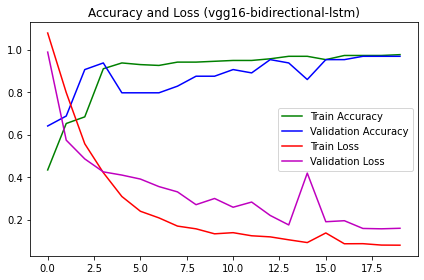

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import itertools

model_name = 'vgg16-bidirectional-lstm'
metrics=None
plt.title('Accuracy and Loss (' + model_name + ')')
if metrics is None:
        metrics = {'accuracy', 'loss'}
if 'accuracy' in metrics:
    plt.plot(history.history['accuracy'], color='g', label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], color='b', label='Validation Accuracy')
if 'loss' in metrics:
    plt.plot(history.history['loss'], color='r', label='Train Loss')
    plt.plot(history.history['val_loss'], color='m', label='Validation Loss')
plt.legend(loc='best')

plt.tight_layout()

plt.show()

Confusion matrix : 
 [[127   0   8]
 [  1 144   2]
 [  6   0 135]]


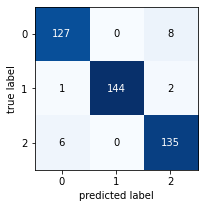

In [ ]:
# confusion matrix
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

matrix = confusion_matrix(act,pred,binary=False)
print('Confusion matrix : \n',matrix)


fig, ax = plot_confusion_matrix(matrix, figsize=(3, 3))
plt.show()


In [ ]:
from keras.models import load_model
from collections import deque
import numpy as np
import cv2
import pickle

In [ ]:
cd C:\Users\Rachael\ML_Soc_Project\data

C:\Users\Rachael\ML_Soc_Project\data


DEMO VIDEO CLASSIFY

In [ ]:
#loading model
import numpy as np

vgg16_include_top = True
data_set_name = 'Soccer_actions'
data_dir_path = './demo/very_large_data'
model_dir_path = './demo/models/' + data_set_name 
config_file_path = Classifier.get_config_file_path(model_dir_path,
                                                                              vgg16_include_top=vgg16_include_top)
weight_file_path = Classifier.get_weight_file_path(model_dir_path,
                                                                              vgg16_include_top=vgg16_include_top)

np.random.seed(42)

predictor = Classifier()
predictor.load_model(config_file_path, weight_file_path)


loading configuration from  ./demo/models/Soccer_actions/vgg16-bidirectional-lstm-config.npy
loading network weights from  ./demo/models/Soccer_actions/vgg16-bidirectional-lstm-weights.h5
build vgg16 with pre-trained model


In [ ]:
#Predicting class for video
import numpy as np
import cv2

cap=cv2.VideoCapture(r'C:\Users\Rachael\ML_Soc_Project\testvideos\socgoal9526-9601.mp4')
fourcc=cv2.VideoWriter_fourcc(*'MJPG')
output=cv2.VideoWriter(r'C:\Users\Rachael\ML_Soc_Project\data\demo\output\SoccerBall.mp4',fourcc,5,(480,240))
predicted_label = predictor.predict(r'C:\Users\Rachael\ML_Soc_Project\testvideos\socgoal9526-9601.mp4')

while(cap.isOpened()):
    ret,frame=cap.read()
    if ret ==True:
        output.write(frame)
        frame = cv2.resize(frame, (550, 340))
        cv2.putText(frame,predicted_label,(20,60),cv2.FONT_HERSHEY_SIMPLEX,2.25,(225,0,0),5)
        cv2.imshow('Demo Video',frame)
        if (cv2.waitKey(1) & 0xFF==ord('q')):
            break
    else:
        break
cap.release()
output.release()
cv2.destroyAllWindows()

Extracting frames from video:  C:\Users\Rachael\ML_Soc_Project\testvideos\socgoal9526-9601.mp4
